 # Iris DataSet - Classificação 

DataSet for 3 kind of Iris flowers: Virginica, Setosa and Versicolor. 
Separated linearly.

### Import Libraries

In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

### Setting and loading dataset columns

In [74]:
columns = ['sepal_length','sepal_width',
           'petal_length', 'petal_width',
           'type']
data = pd.read_csv('iris_dataset.csv',names=columns)

In [75]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [76]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
print(data.shape)

(150, 5)


In [78]:
print(data.groupby('type').size())

type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


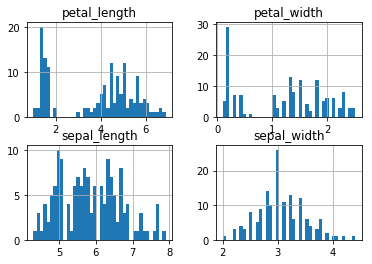

In [79]:
data.hist(bins=40);

In [80]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Creation Validation Dataset

In [81]:
dataset = data.values
print(dataset)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [82]:
np.random.seed(1)
np.random.shuffle(dataset)

In [83]:
dataset

array([[5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.1, 2.5, 3.0, 1.1, 'Iris-versicolor'],
       [6.6, 3.0, 4.4, 1.4, 'Iris-versicolor'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [7.9, 3.8, 6.4, 2.0, 'Iris-virginica'],
       [6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'],
       [6.9, 3.1, 5.1, 2.3, 'Iris-virginica'],
       [5.1, 3.8, 1.9, 0.4, 'Iris-setosa'],
       [4.7, 3.2, 1.6, 0.2, 'Iris-setosa'],
       [6.9, 3.2, 5.7, 2.3, 'Iris-virginica'],
       [5.6, 2.7, 4.2, 1.3, 'Iris-versicolor'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7.1, 3.0, 5.9, 2.1, 'Iris-virginica'],
       [6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'],
       [6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'],
       [4.4, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [5.8, 2.6, 4.0, 1.2, 'Iris-versicolor'],
       [5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'],
       [5.4, 3.4, 1.5, 0.4, 'Iris-setosa'],
       [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'],
       [5.5, 2.6, 4.4, 1.2, 'Iris-versicolor'],
       [5.4, 3.0, 4.5, 1.5, 

In [84]:
X = dataset[:,:4]
Y = dataset[:,4]

In [85]:
n_train = int(round(len(Y) * 0.70))
X_train = X[:n_train,:]
Y_train = Y[:n_train]
X_test = X[n_train:,:]
Y_test = Y[n_train:]

In [86]:
X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((150, 4), (150,), (105, 4), (105,), (45, 4), (45,))

### Create models

#### Used classificators


- DecisionTreeClassifier  
- SVC  
- KNN  
- Logistic Regression  
- Naive Bayes  
- SGDClassifier  
- RandomForest  
- GradientBoosting  

#### Defining the models

In [87]:
model_decisiontree = tree.DecisionTreeClassifier()
model_svc = svm.SVC()
model_knn = neighbors.KNeighborsClassifier()
model_logisticregression = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
model_naivebayes = naive_bayes.GaussianNB()
model_sgdclassifier = linear_model.SGDClassifier()
model_randomforest = ensemble.RandomForestClassifier()
model_gradientboosting = ensemble.GradientBoostingClassifier()

#### Training models

In [88]:
model_decisiontree.fit(X_train,Y_train)
model_svc.fit(X_train,Y_train)
model_knn.fit(X_train,Y_train)
model_logisticregression.fit(X_train,Y_train)
model_naivebayes.fit(X_train,Y_train)
model_sgdclassifier.fit(X_train,Y_train)
model_randomforest.fit(X_train,Y_train)
model_gradientboosting.fit(X_train,Y_train)

C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [89]:
pred_decisiontree = model_decisiontree.predict(X_test)
pred_svc = model_svc.predict(X_test)
pred_knn = model_knn.predict(X_test)
pred_logisticregression = model_logisticregression.predict(X_test)
pred_naivebayes = model_naivebayes.predict(X_test)
pred_sgdclassifier = model_sgdclassifier.predict(X_test)
pred_randomforest = model_randomforest.predict(X_test)
pred_gradientboosting = model_gradientboosting.predict(X_test)

print(pred_svc)
print (Y_test)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa']
['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'I

### Results

#### DecisionTreeClassifier

In [90]:
print(metrics.classification_report(Y_test, pred_decisiontree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.76      0.87      0.81        15
 Iris-virginica       0.82      0.69      0.75        13

      micro avg       0.87      0.87      0.87        45
      macro avg       0.86      0.85      0.85        45
   weighted avg       0.87      0.87      0.87        45



In [91]:
accuracy_predDec = metrics.accuracy_score(Y_test, pred_decisiontree)
print(accuracy_predDec)

0.8666666666666667


#### C-Support Vector Classification (SVC)

In [92]:
print(metrics.classification_report(Y_test, pred_svc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        13

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [93]:
accuracy_predSvc = metrics.accuracy_score(Y_test, pred_svc)
print(accuracy_predSvc)

0.9777777777777777


#### KNeighborsClassifier (KNN)

In [94]:
print(metrics.classification_report(Y_test, pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.86      0.92      0.89        13

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [95]:
accuracy_predKnn = metrics.accuracy_score(Y_test, pred_knn)
print(accuracy_predKnn)

0.9333333333333333


#### LogisticaRegression

In [96]:
print(metrics.classification_report(Y_test, pred_logisticregression))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [97]:
accuracy_predLR = metrics.accuracy_score(Y_test, pred_logisticregression)
print(accuracy_predLR)

0.9555555555555556


#### GaussianNB

In [98]:
print(metrics.classification_report(Y_test, pred_naivebayes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.82      0.93      0.87        15
 Iris-virginica       0.91      0.77      0.83        13

      micro avg       0.91      0.91      0.91        45
      macro avg       0.91      0.90      0.90        45
   weighted avg       0.91      0.91      0.91        45



In [99]:
accuracy_predNB = metrics.accuracy_score(Y_test, pred_naivebayes)
print(accuracy_predNB)

0.9111111111111111


#### SGDClassifier

In [100]:
print(metrics.classification_report(Y_test, pred_sgdclassifier))

                 precision    recall  f1-score   support

    Iris-setosa       0.94      1.00      0.97        17
Iris-versicolor       0.00      0.00      0.00        15
 Iris-virginica       0.48      1.00      0.65        13

      micro avg       0.67      0.67      0.67        45
      macro avg       0.48      0.67      0.54        45
   weighted avg       0.50      0.67      0.55        45



C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
accuracy_predSGDC = metrics.accuracy_score(Y_test, pred_sgdclassifier)
print(accuracy_predSGDC)

0.6666666666666666


#### RandomForestClassifier

In [102]:
print(metrics.classification_report(Y_test, pred_randomforest))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.90      0.69      0.78        13

      micro avg       0.89      0.89      0.89        45
      macro avg       0.89      0.88      0.88        45
   weighted avg       0.90      0.89      0.89        45



In [103]:
accuracy_predRandomF = metrics.accuracy_score(Y_test, pred_sgdclassifier)
print(accuracy_predRandomF)

0.6666666666666666


#### GradientBoostingClassifier

In [104]:
print(metrics.classification_report(Y_test, pred_gradientboosting))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.90      0.69      0.78        13

      micro avg       0.89      0.89      0.89        45
      macro avg       0.89      0.88      0.88        45
   weighted avg       0.90      0.89      0.89        45



In [105]:
accuracy_predGradientB = metrics.accuracy_score(Y_test, pred_gradientboosting)
print(accuracy_predGradientB)

0.8888888888888888


### Comparing the Results

In [106]:
class_names = ['Decision Tree      ','Support Vector C   ','KneighborsC        ',
               'Logistic Regression','GaussianNB         ','SGDClassifier      ',
               'Random Forest C    ','Gradient Boosting C']
class_names_graphic = ['DTC','SVC','KNN', 'LR','NB','SGD', 'RF','GB']
class_ = [accuracy_predDec, accuracy_predSvc, accuracy_predKnn, accuracy_predLR, accuracy_predNB,
          accuracy_predSGDC, accuracy_predRandomF, accuracy_predGradientB]

for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

Decision Tree      : 0.8666666666666667
Support Vector C   : 0.9777777777777777
KneighborsC        : 0.9333333333333333
Logistic Regression: 0.9555555555555556
GaussianNB         : 0.9111111111111111
SGDClassifier      : 0.6666666666666666
Random Forest C    : 0.6666666666666666
Gradient Boosting C: 0.8888888888888888


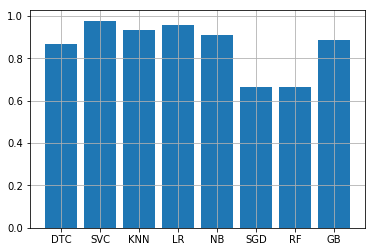

In [107]:
plt.grid()
plt.bar(range(len(class_names)), class_)
plt.xticks(range(len(class_names)), class_names_graphic);

In [108]:
final_model = svm.SVC()
final_model.fit(X,Y)

C:\Users\Jonas Lopes\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### WIth this, we can conclude that model with more accuracy was SVC - Support Vector Classifier with aproximately 0.9777